# Comparing Ethan Nwaneri's goals and assists per 90 with U-21 forwards from across the top 5 European leagues

Ethan Nwaneri enjoyed a breakthrough season with Arsenal last season, he was pushed into action after several eye catching performances in the EFL Cup. With Bukayo Saka suffering a significant injury in December, Nwaneri was then thrust into the first XI where he look every bit a seasoned pro, displaying talent and consistency that belies his tender age.

So how does the 18-year old attacking contributions, namely his goals and assists compared with other young attackers across Europe's top five leagues? Let's examine it deeper.

In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from adjustText import adjust_text
from mplsoccer import Pitch
from PIL import Image
import urllib
import os

## Load the data
We will need shooting data to compare Nwaneri and his peers, using the function below we can access shooting data from across Europe's top five leagues.

In [2]:
# Create a function to access data from FBRef
# For this analysis the data required is shooting data from Big 5 European Leagues

def access_player_data(url):
    try:
        # Read all tables from the webpage
        tables = pd.read_html(url, attrs={'id': 'stats_standard'})
        
        # Check if the table exists
        if tables:
            return tables[0]  # Return the first table
        else:
            print("No table found with the specified ID.")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [3]:
# Provide the URL, save it into a variable called 'url'
url = 'https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats'

# Call the function and save it to a variable called 'df'
df = access_player_data(url)

In [4]:
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk             Player             Nation   
0                     1         Max Aarons            eng ENG   
1                     2         Max Aarons            eng ENG   
2                     3     Rodrigo Abajas             es ESP   
3                     4     James Abankwah             ie IRL   
4                     5  Keyliane Abdallah             fr FRA   
...                 ...                ...                ...   
2963                 Rk             Player             Nation   
2964               2851   Szymon Żurkowski             pl POL   
2965               2852    Martin Ødegaard             no NOR   
2966               2853        Milan Đurić             ba BIH   
2967               2854        Milan Đurić             ba BIH   

     Unnamed: 3_level_0 Unnamed: 4_level_0  Unnamed: 5_level_0  \
                    Pos              Squad                Comp   
0                    DF        Bournemouth  eng Premier League   
1                 DF,MF           Valencia          es La Liga   
2                    DF           Valencia          es La Liga   
3                 DF,MF            Udinese          it Serie A   
4                    FW          Marseille          fr Ligue 1   
...                 ...                ...                 ...   
2963                Pos              Squad                Comp   
2964                 MF             Empoli          it Serie A   
2965                 MF            Arsenal  eng Premier League   
2966                 FW              Monza          it Serie A   
2967                 FW              Parma          it Serie A   

     Unnamed: 6_level_0 Unnamed: 7_level_0 Playing Time          ...  \
                    Age               Born           MP  Starts  ...   
0                    24               2000            3       1  ...   
1                    24               2000            4       1  ...   
2                    21               2003            1       1  ...   
3                    20               2004            6       0  ...   
4                    18               2006            1       0  ...   
...                 ...                ...          ...     ...  ...   
2963                Age               Born           MP  Starts  ...   
2964                 26               1997            5       0  ...   
2965                 25               1998           30      26  ...   
2966                 34               1990           18      13  ...   
2967                 34               1990            9       3  ...   

     Per 90 Minutes                                                          \
                Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG   
0              0.00  0.00  0.00    0.00  0.00  0.00    0.00  0.00      0.00   
1              0.00  0.00  0.00    0.00  0.00  0.02    0.02  0.00      0.02   
2              0.00  0.00  0.00    0.00  0.10  0.00    0.10  0.10      0.10   
3              0.00  0.00  0.00    0.00  0.06  0.00    0.06  0.06      0.06   
4              0.00  0.00  0.00    0.00  0.00  0.00    0.00  0.00      0.00   
...             ...   ...   ...     ...   ...   ...     ...   ...       ...   
2963            Ast   G+A  G-PK  G+A-PK    xG   xAG  xG+xAG  npxG  npxG+xAG   
2964           0.00  0.00  0.00    0.00  0.07  0.00    0.07  0.07      0.07   
2965           0.31  0.43  0.08    0.39  0.19  0.21    0.40  0.16      0.37   
2966           0.07  0.35  0.28    0.35  0.21  0.08    0.28  0.21      0.28   
2967           0.00  0.34  0.34    0.34  0.08  0.00    0.08  0.08      0.08   

     Unnamed: 37_level_0  
                 Matches  
0                Matches  
1                Matches  
2                Matches  
3                Matches  
4                Matches  
...                  ...  
2963             Matches  
2964             Matches  
2965             Matches  
2966             Matches  
2967       

## Data Cleaning and Processing
We need to clean the data by removing top-level columns and unused columns. We will also filter the data to only include those born in 2004 or after, with a threshold of at least 800 league minutes played. We then calculate the assists and goals per 90 to normalize the comparison.

In [5]:
# We can use this function to clean the dataframe
def clean_data(df):
    # Drop the top level columns (if multi-index)
    if df.columns.nlevels > 1:
        df = df.droplevel(0, axis=1)

    # Drop the 'Matches' column if it exists
    if 'Matches' in df.columns:
        df = df.drop('Matches', axis=1)

    # Remove duplicate columns
    df = df.loc[:, ~df.columns.duplicated()]

    # Clean up column names by stripping any leading/trailing spaces
    df.columns = df.columns.str.strip()

    # Convert the values in '90s' to numeric values, coercing errors
    df['90s'] = pd.to_numeric(df['90s'], errors='coerce')

    # Fill NaN values with 0.0
    df.fillna(0.0, inplace=True)

    # Create the 'minutes' column
    df['minutes'] = (df['90s'].astype(float) * 90).round().astype(int)

    # Filter players based on position (e.g., only forwards 'FW')
    df = df[df['Pos'].str.contains('FW', na=False)]  # Safe check for 'FW'

    # Filter players based on minutes played (at least 500 minutes)
    df = df[df['minutes'] >= 800]

    # Ensure 'Born' is numeric
    df['Born'] = pd.to_numeric(df['Born'], errors='coerce').astype('Int64')
    df = df[df['Born'] >= 2004]

    # Convert stats columns safely
    if 'Gls' in df.columns:
        df['Gls'] = pd.to_numeric(df['Gls'], errors='coerce').fillna(0).astype(int)
    if 'Ast' in df.columns:
        df['Ast'] = pd.to_numeric(df['Ast'], errors='coerce').fillna(0).astype(float)
    if 'PK' in df.columns:
        df['PK'] = pd.to_numeric(df['PK'], errors='coerce').fillna(0).astype(int)
    if 'npxG' in df.columns:
        df['npxG'] = pd.to_numeric(df['npxG'], errors='coerce').fillna(0.0).astype(float)

    # Create a column for non-penalty goals (npG)
    df['npG'] = (df['Gls'] - df['PK']).round().astype(int)

    return df

In [6]:
# Apply the function and save the output to 'df'
df = clean_data(df)
# Inspect the output
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,G+A-PK,xG+xAG,minutes,npG
88,86,Mohamed Ali Cho,fr FRA,"FW,MF",Nice,fr Ligue 1,20,2004,27,21,...,4.0,4.0,7.9,81,59,133,0.39,0.44,1620,3
304,294,Eliesse Ben Seghir,ma MAR,"MF,FW",Monaco,fr Ligue 1,19,2005,33,19,...,4.1,5.2,9.3,85,122,170,0.36,0.55,1746,4
351,339,Tom Bischof,de GER,"MF,FW",Hoffenheim,de Bundesliga,19,2005,31,30,...,2.2,3.6,5.9,47,138,102,0.25,0.21,2556,5
381,368,Badredine Bouanani,dz ALG,"MF,FW",Nice,fr Ligue 1,19,2004,26,11,...,1.9,2.4,4.3,47,44,93,0.41,0.42,1098,2
428,413,Facundo Buonanotte,ar ARG,"FW,MF",Leicester City,eng Premier League,19,2004,31,14,...,3.9,3.1,7.0,39,54,74,0.41,0.41,1521,5
529,510,Santiago Castro,ar ARG,FW,Bologna,it Serie A,19,2004,36,27,...,6.9,2.9,9.8,17,39,136,0.47,0.41,2295,8
736,709,Mamadou Diakhon,fr FRA,"FW,MF",Reims,fr Ligue 1,18,2005,28,5,...,1.0,1.1,2.2,61,17,77,0.31,0.23,855,2
740,713,Assane Diao,sn SEN,"FW,MF",Como,it Serie A,18,2005,15,14,...,4.0,0.4,4.4,50,36,116,0.65,0.31,1251,8
742,715,Habib Diarra,sn SEN,"MF,FW",Strasbourg,fr Ligue 1,20,2004,30,27,...,1.8,4.5,6.3,61,116,114,0.27,0.30,2349,2
754,726,Tyler Dibling,eng ENG,"FW,MF",Southampton,eng Premier League,18,2006,33,20,...,2.5,1.5,4.1,69,64,96,0.10,0.20,1872,2


In [7]:
# Check the name of the columns
print(df.columns)
# Preview the first few rows of the dataframe
print(df.head())
# Check the data types
print(df.dtypes)

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'G+A-PK', 'xG+xAG', 'minutes', 'npG'],
      dtype='object')
      Rk              Player  Nation    Pos           Squad  \
88    86     Mohamed Ali Cho  fr FRA  FW,MF            Nice   
304  294  Eliesse Ben Seghir  ma MAR  MF,FW          Monaco   
351  339         Tom Bischof  de GER  MF,FW      Hoffenheim   
381  368  Badredine Bouanani  dz ALG  MF,FW            Nice   
428  413  Facundo Buonanotte  ar ARG  FW,MF  Leicester City   

                   Comp Age  Born  MP Starts  ... npxG  xAG  npxG+xAG  PrgC  \
88           fr Ligue 1  20  2004  27     21  ...  4.0  4.0       7.9    81   
304          fr Ligue 1  19  2005  33     19  ...  4.1  5.2       9.3    85   
351       de Bundesliga  19  2005  31     30  ...  2.2  3.6       5.9    47   
381 

In [8]:
# Calculate per 90 values
df["Gls"] = df["Gls"] / (df["minutes"] / 90)
df["Ast"] = df["Ast"] / (df["minutes"] / 90)

# Normalize minutes for bubble size
df["BubbleSize"] = (df["minutes"] / df["minutes"].max()) * 1500  # scale for plotting

## Plot the Players
We will plot the players' goals and assists per 90. The x-axis will be goals per 90, while the y-axis will be assists per 90. Each bubble represent a player where the bigger the bubble means more minutes played. Two dashed lines will run along the x and y axes, representing the mean Goals and Assists per 90.

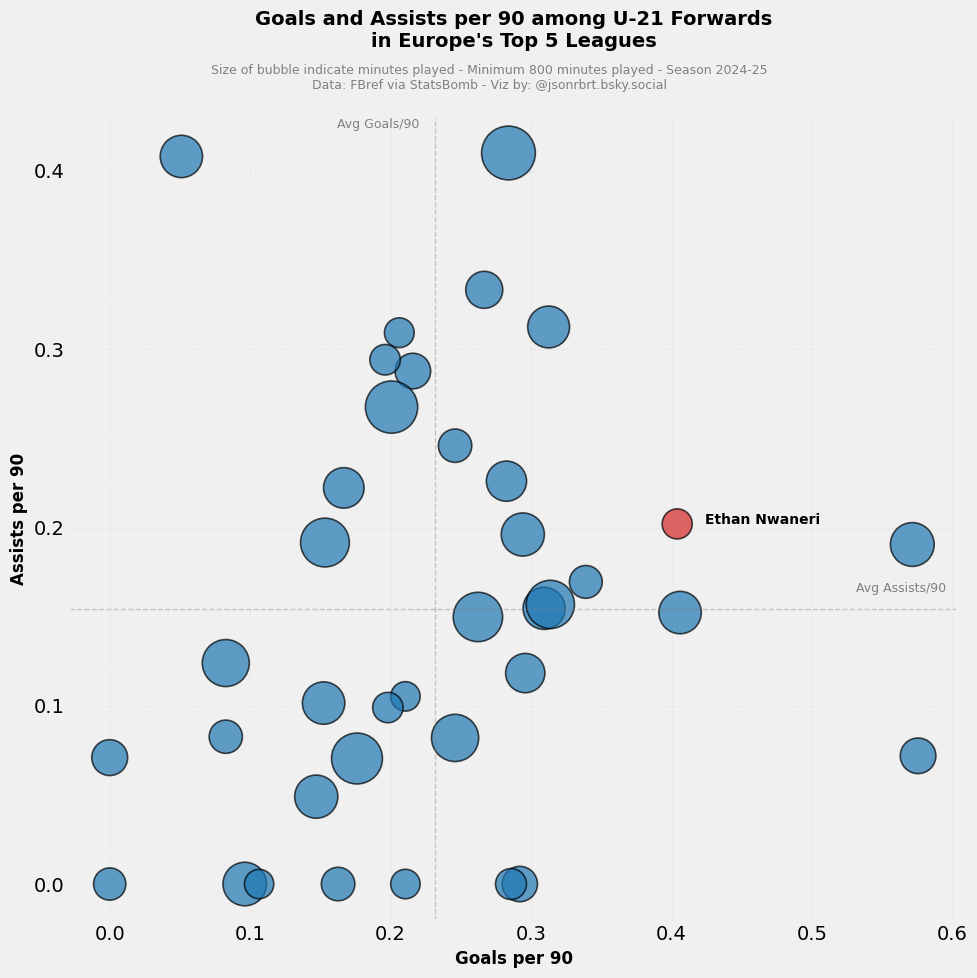

In [9]:
# Create a plot in 'fivethirtyeight' style
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(10, 10), facecolor='#f0f0f0')
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.1)

# Reference lines
avg_goals = df["Gls"].mean()
avg_assists = df["Ast"].mean()
ax.axvline(avg_goals, color='grey', linestyle='--', linewidth=1, alpha=0.4)
ax.axhline(avg_assists, color='grey', linestyle='--', linewidth=1, alpha=0.4)
# Position the average labels just inside the axes
ax.text(avg_goals - 0.07, avg_assists + 0.27, "Avg Goals/90", fontsize=9, color='grey')
ax.text(avg_goals + 0.3, avg_assists + 0.01, "Avg Assists/90", fontsize=9, color='grey')

# Bubble plot
scatter = ax.scatter(
    df["Gls"],
    df["Ast"],
    s=df["BubbleSize"],
    c=np.where(df["Player"] == "Ethan Nwaneri", "#d62728", "#1f77b4"),
    alpha=0.7,
    edgecolors="black",
    linewidth=1.2
)

# Label Ethan Nwaneri only
nwaneri_row = df[df["Player"] == "Ethan Nwaneri"].iloc[0]
ax.text(
    nwaneri_row["Gls"] + 0.02,
    nwaneri_row["Ast"],
    "Ethan Nwaneri",
    fontsize=10,
    weight="bold",
    color="black"
)

# Axes labels and title
ax.set_xlabel("Goals per 90", fontsize=12, weight="bold")
ax.set_ylabel("Assists per 90", fontsize=12, weight="bold")
ax.set_title(
    "Goals and Assists per 90 among U-21 Forwards\nin Europe's Top 5 Leagues",
    fontsize=14, weight="bold", pad=50
)
# Add annotation for data source
fig.text(0.5, 0.9, "Size of bubble indicate minutes played - Minimum 800 minutes played - Season 2024-25\nData: FBref via StatsBomb - Viz by: @jsonrbrt.bsky.social", 
         ha='center', fontsize=9, color='gray')

plt.tight_layout()
plt.show()

In [10]:
# Save the bubble chart to a PNG file
fig.savefig('visuals/nwaneri_assists_goals_per90_comparison.png', dpi=300, bbox_inches='tight')

## Summary and Takeaways: Nwaneri is an Elite Attacking Prospect
As we can see in the chart above, Nwaneri is among the top players in attacking output, with above average goals and assists per 90 (0.4 and 0.2 respectively). This shows that Nwaneri has the capacity to grow as a player that can contribute double-digit goals and assists, something that Mikel Arteta will certainly look to utilize more in the coming season. The Arsenal manager also spoke of Nwaneri's future position, hinting that he could play as a central midfielder or even as a number nine. Arsenal certainly has unearthed a gem, and Nwaneri's performance last season only goes to show why Arteta did not hesitate to give him a first-team debut at 15.